In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors


sc.set_figure_params(dpi = 450, dpi_save = 450)

In [2]:
# Reading
mistr_data = sc.read_h5ad('/Volumes/Gaurav_SSD/rathore_et_al/datasets_to_upload/mistr-atlas/all_mnn/all_mistr_mnn.h5ad')

In [3]:
# subset data
mistr_data = mistr_data[mistr_data.obs["day"].isin(["day 0", "day 01", "day 02", "day 05"])]
mistr_data = mistr_data[~mistr_data.obs["tissue"].isin(["D/V forebrain d 05"])]

In [4]:
mistr_data.obs["day"].value_counts()

day
day 05    25633
day 02    11102
day 01     9920
day 0      8197
Name: count, dtype: int64

In [5]:
mistr_data.obs["tissue"].value_counts()

tissue
R/C dorsal d 05     15965
R/C ventral d 05     9668
R/C ventral d 01     8887
 ES d 0              8197
R/C ventral d 02     6547
R/C dorsal d 02      4555
R/C dorsal d 01      1033
Name: count, dtype: int64

In [6]:
# Normalize
sc.pp.normalize_total(mistr_data)
sc.pp.log1p(mistr_data)

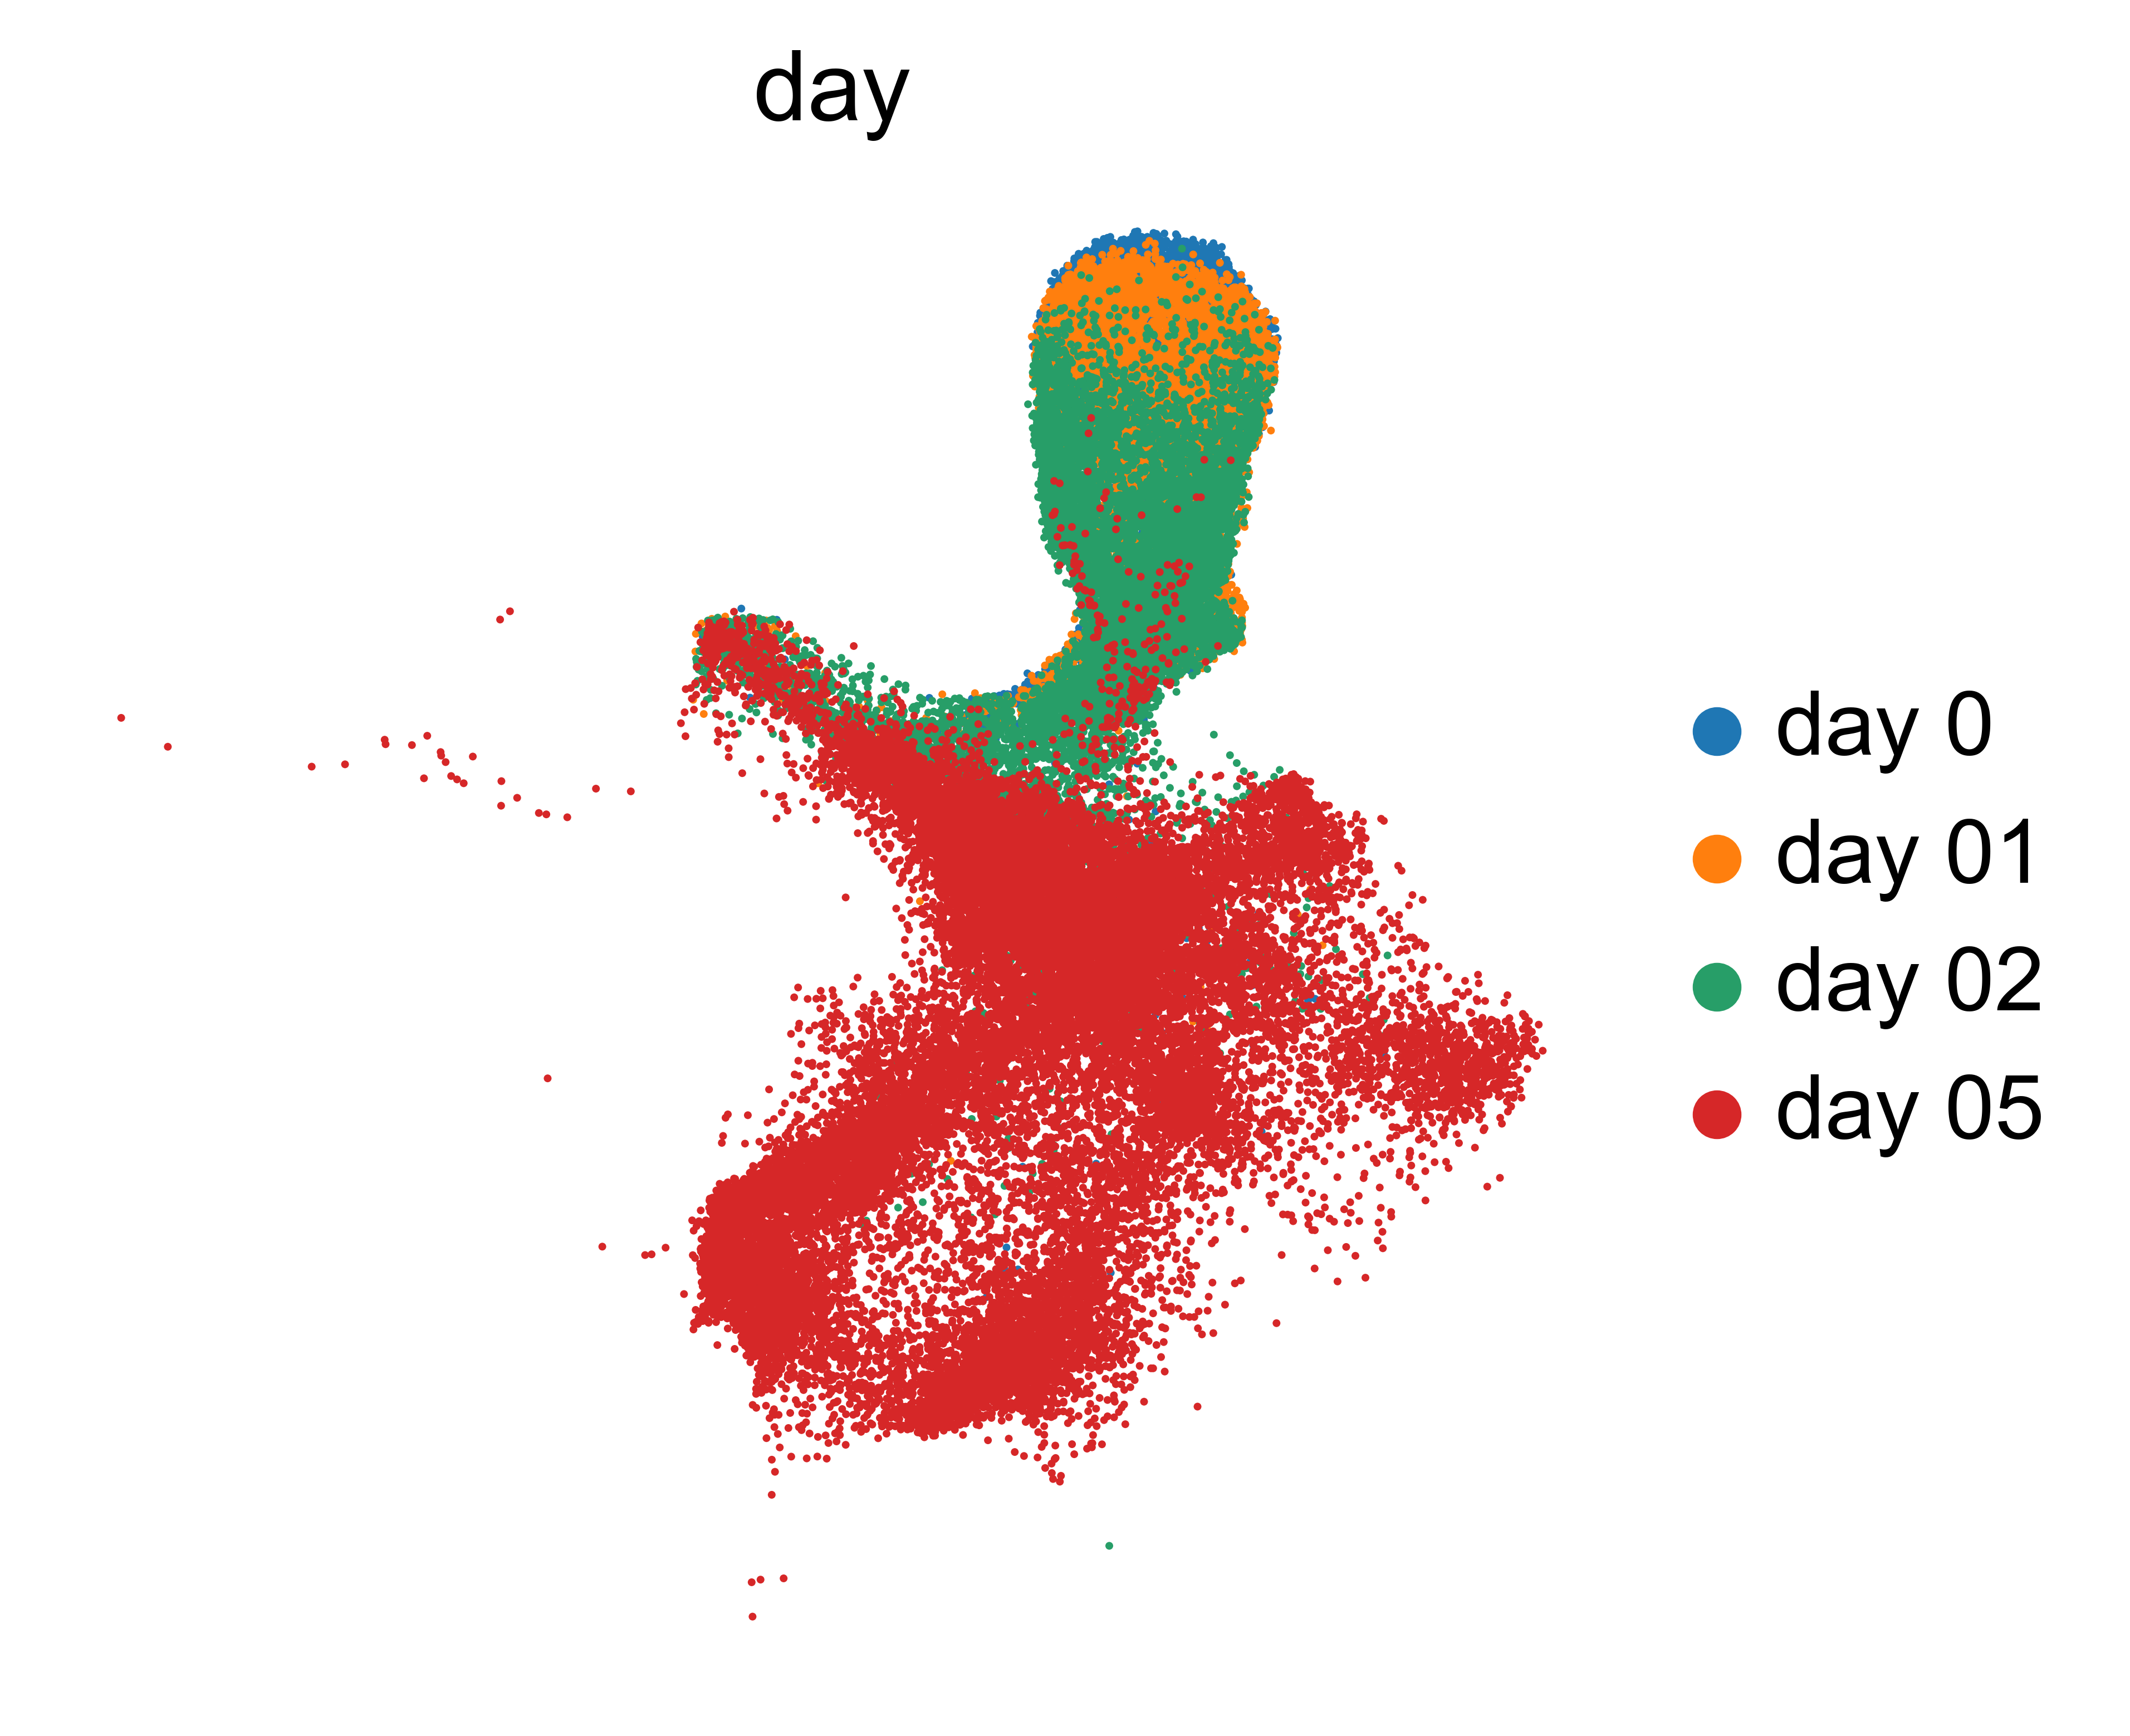

In [7]:
sc.pl.umap(mistr_data, color = 'day', frameon=False,size=5)

In [8]:
# Pca is not computed in mistr atlas
sc.pp.highly_variable_genes(mistr_data)
mistr_data.raw = mistr_data
mistr_data = mistr_data[:, mistr_data.var.highly_variable]
sc.pp.scale(mistr_data)
sc.tl.pca(mistr_data)
sc.pp.neighbors(mistr_data)
mistr_data

AnnData object with n_obs × n_vars = 54852 × 3918
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'day', 'model', 'tissue', 'source', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'SCT_snn_res.1', 'SCT_snn_res.1.2', 'nCount_integrated', 'nFeature_integrated', 'ident'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'day_colors', 'hvg', 'pca', 'neighbors'
    obsm: 'MNN', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [14]:
sc.tl.draw_graph(mistr_data, random_state=8)



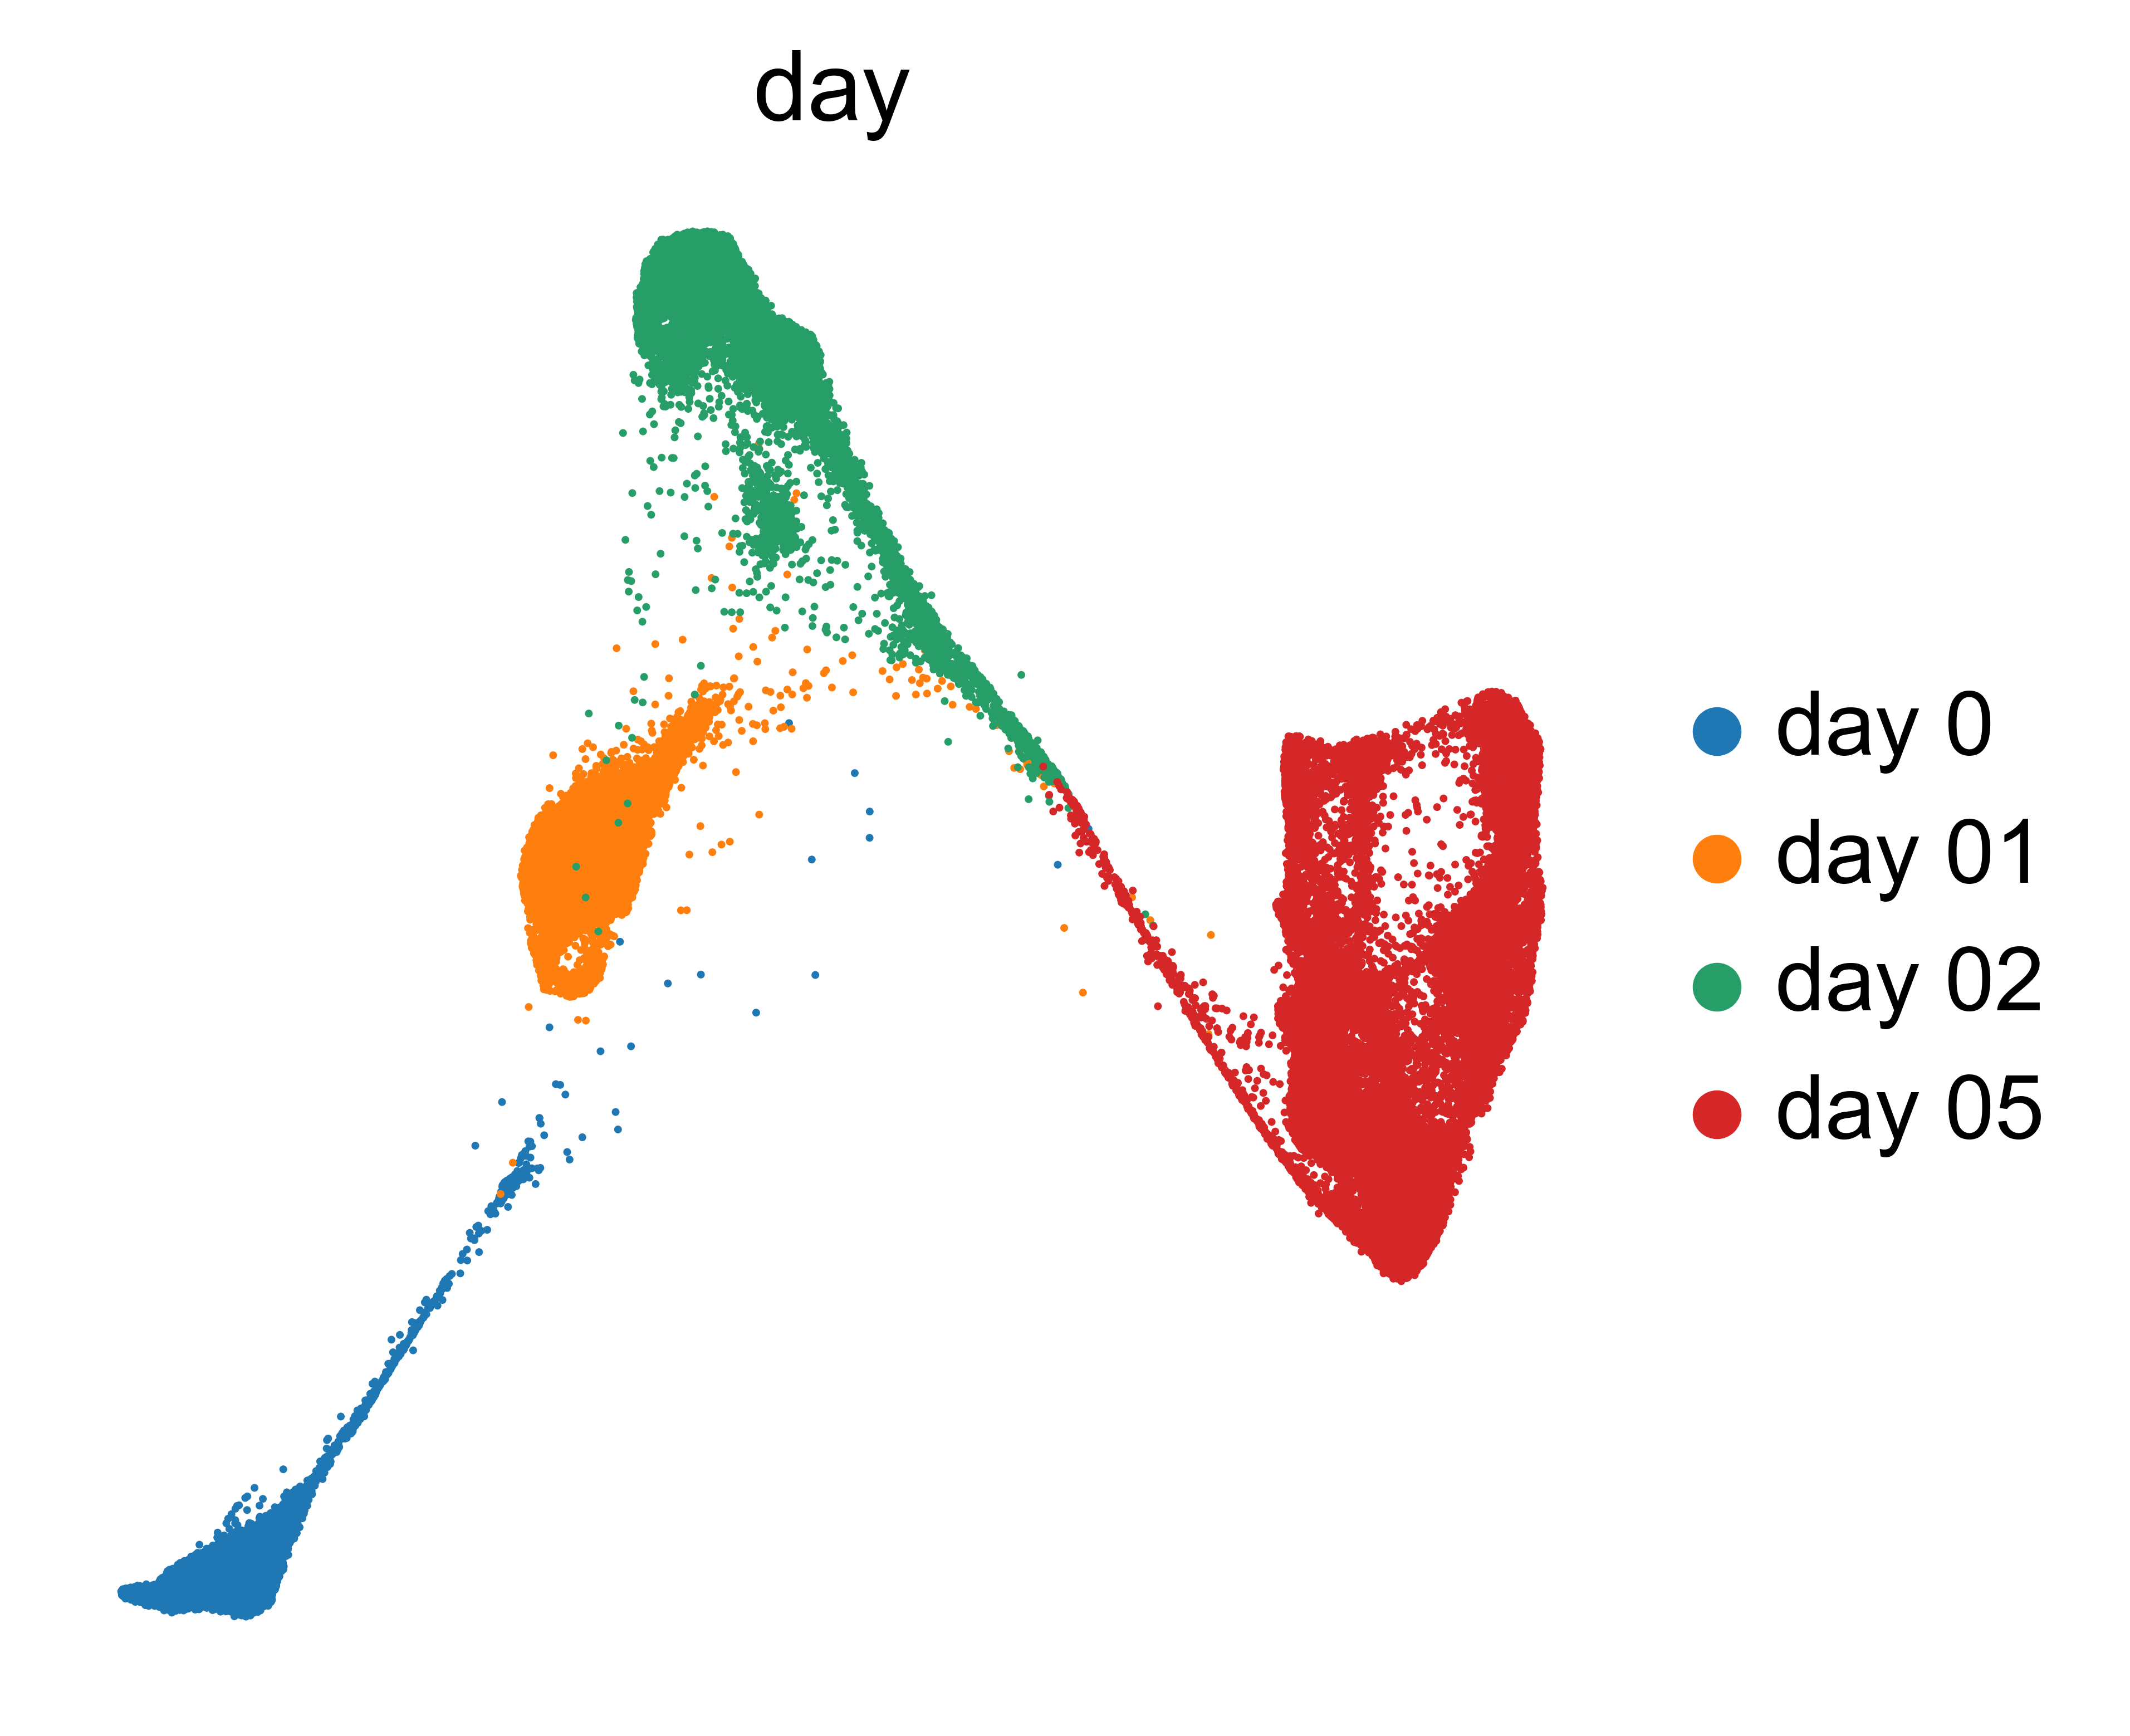

In [3]:
sc.pl.draw_graph(mistr_data, color = 'day', frameon=False,size=5, save = 'day.svg')

In [16]:
mistr_data.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
d0es_AAACCTGAGTAATCCC       d0es      7383.0          3179    2.878988   
d0es_AAACCTGAGTACACCT       d0es      4369.0          2290    3.297941   
d0es_AAACCTGAGTGATCGG       d0es      1699.0          1132    5.281237   
d0es_AAACCTGAGTGGGCTA       d0es      6140.0          2812    2.539536   
d0es_AAACCTGCAAGGCTCC       d0es      5301.0          2575    7.686202   
...                          ...         ...           ...         ...   
d05v_TTTGTTGCATACACCA        d5v     11074.0          4280    4.258384   
d05v_TTTGTTGCATGGGTTT        d5v     18260.0          5462    3.135674   
d05v_TTTGTTGCATTCACCC        d5v     11455.0          4164    2.782332   
d05v_TTTGTTGTCCGCGATG        d5v     18859.0          5641    5.155138   
d05v_TTTGTTGTCGTAACAC        d5v     15103.0          5106    6.386412   

                        S.Score  G2M.Score Phase  nCount_SCT  nFeature_SCT  \
d0es_AAACCTGAGTAATCCC  0.131841  -0.040909     S      6842.0          3179   
d0es_AAACCTGAGTACACCT  0.185515   0.174807     S      5487.0          2293   
d0es_AAACCTGAGTGATCGG  0.049377   0.190644   G2M      4980.0          1615   
d0es_AAACCTGAGTGGGCTA -0.001721   0.196395   G2M      6144.0          2812   
d0es_AAACCTGCAAGGCTCC  0.118444   0.003721     S      5677.0          2575   
...                         ...        ...   ...         ...           ...   
d05v_TTTGTTGCATACACCA  0.395312   0.222669     S      7181.0          4021   
d05v_TTTGTTGCATGGGTTT  0.212998   0.319828   G2M      6684.0          3309   
d05v_TTTGTTGCATTCACCC -0.127824  -0.131869    G1      7192.0          3819   
d05v_TTTGTTGTCCGCGATG  0.326662   0.712828   G2M      6512.0          3272   
d05v_TTTGTTGTCGTAACAC  0.267179   0.669263   G2M      7040.0          3804   

                      SCT_snn_res.0.4  ...    HTO_classification  \
d0es_AAACCTGAGTAATCCC               1  ...                   NaN   
d0es_AAACCTGAGTACACCT               3  ...                   NaN   
d0es_AAACCTGAGTGATCGG               1  ...                   NaN   
d0es_AAACCTGAGTGGGCTA               3  ...                   NaN   
d0es_AAACCTGCAAGGCTCC               0  ...                   NaN   
...                               ...  ...                   ...   
d05v_TTTGTTGCATACACCA               0  ...  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGCATGGGTTT               4  ...  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGCATTCACCC               6  ...  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGTCCGCGATG               2  ...  HTO1-GTCAACTCTTTAGCG   
d05v_TTTGTTGTCGTAACAC               2  ...  HTO2-TGATGGCCTATTGGG   

                      HTO_classification.global               hash.ID  \
d0es_AAACCTGAGTAATCCC                       NaN                   NaN   
d0es_AAACCTGAGTACACCT                       NaN                   NaN   
d0es_AAACCTGAGTGATCGG                       NaN                   NaN   
d0es_AAACCTGAGTGGGCTA                       NaN                   NaN   
d0es_AAACCTGCAAGGCTCC                       NaN                   NaN   
...                                         ...                   ...   
d05v_TTTGTTGCATACACCA                   Singlet  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGCATGGGTTT                   Singlet  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGCATTCACCC                   Singlet  HTO5-AAGTATCGTTTCGCA   
d05v_TTTGTTGTCCGCGATG                   Singlet  HTO1-GTCAACTCTTTAGCG   
d05v_TTTGTTGTCGTAACAC                   Singlet  HTO2-TGATGGCCTATTGGG   

                      SCT_snn_res.0.6 SCT_snn_res.0.8  SCT_snn_res.1  \
d0es_AAACCTGAGTAATCCC             NaN             NaN            NaN   
d0es_AAACCTGAGTACACCT             NaN             NaN            NaN   
d0es_AAACCTGAGTGATCGG             NaN             NaN            NaN   
d0es_AAACCTGAGTGGGCTA             NaN             NaN            NaN   
d0es_AAACCTGCAAGGCTCC             NaN             NaN            NaN   
...                               ...             ...            ...  

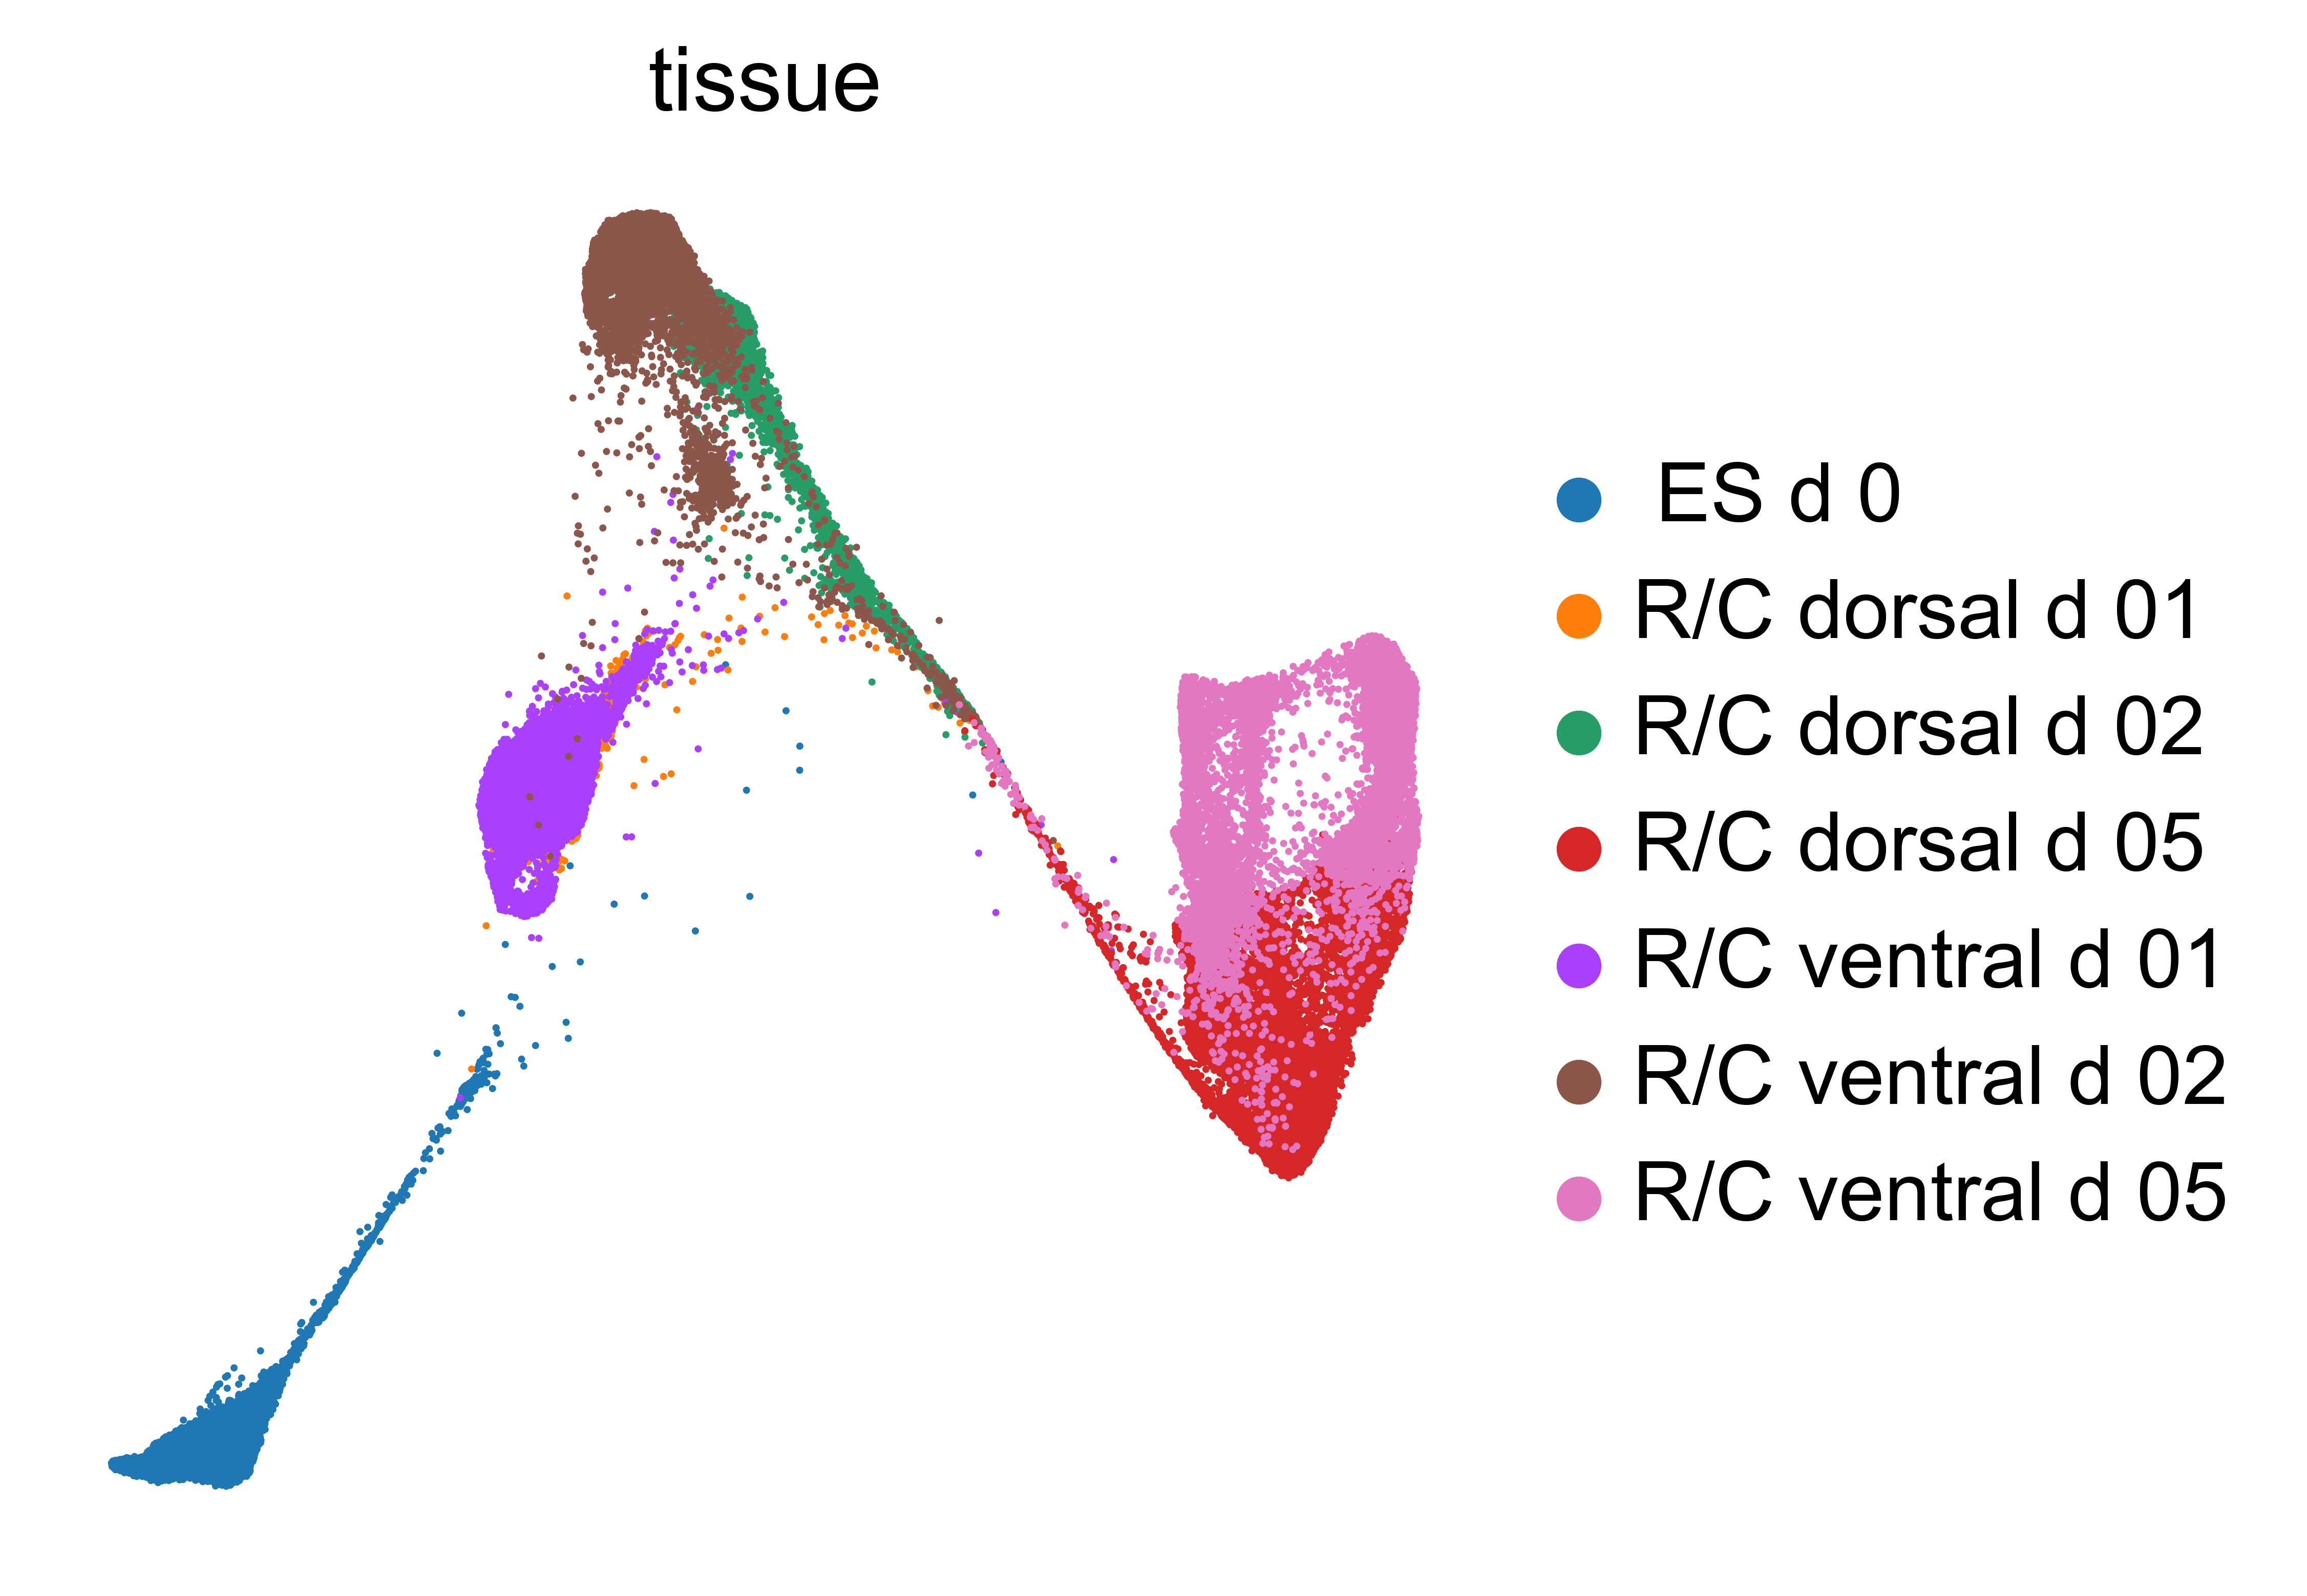

In [17]:
sc.pl.draw_graph(mistr_data, color = 'tissue' ,frameon=False,size=5)

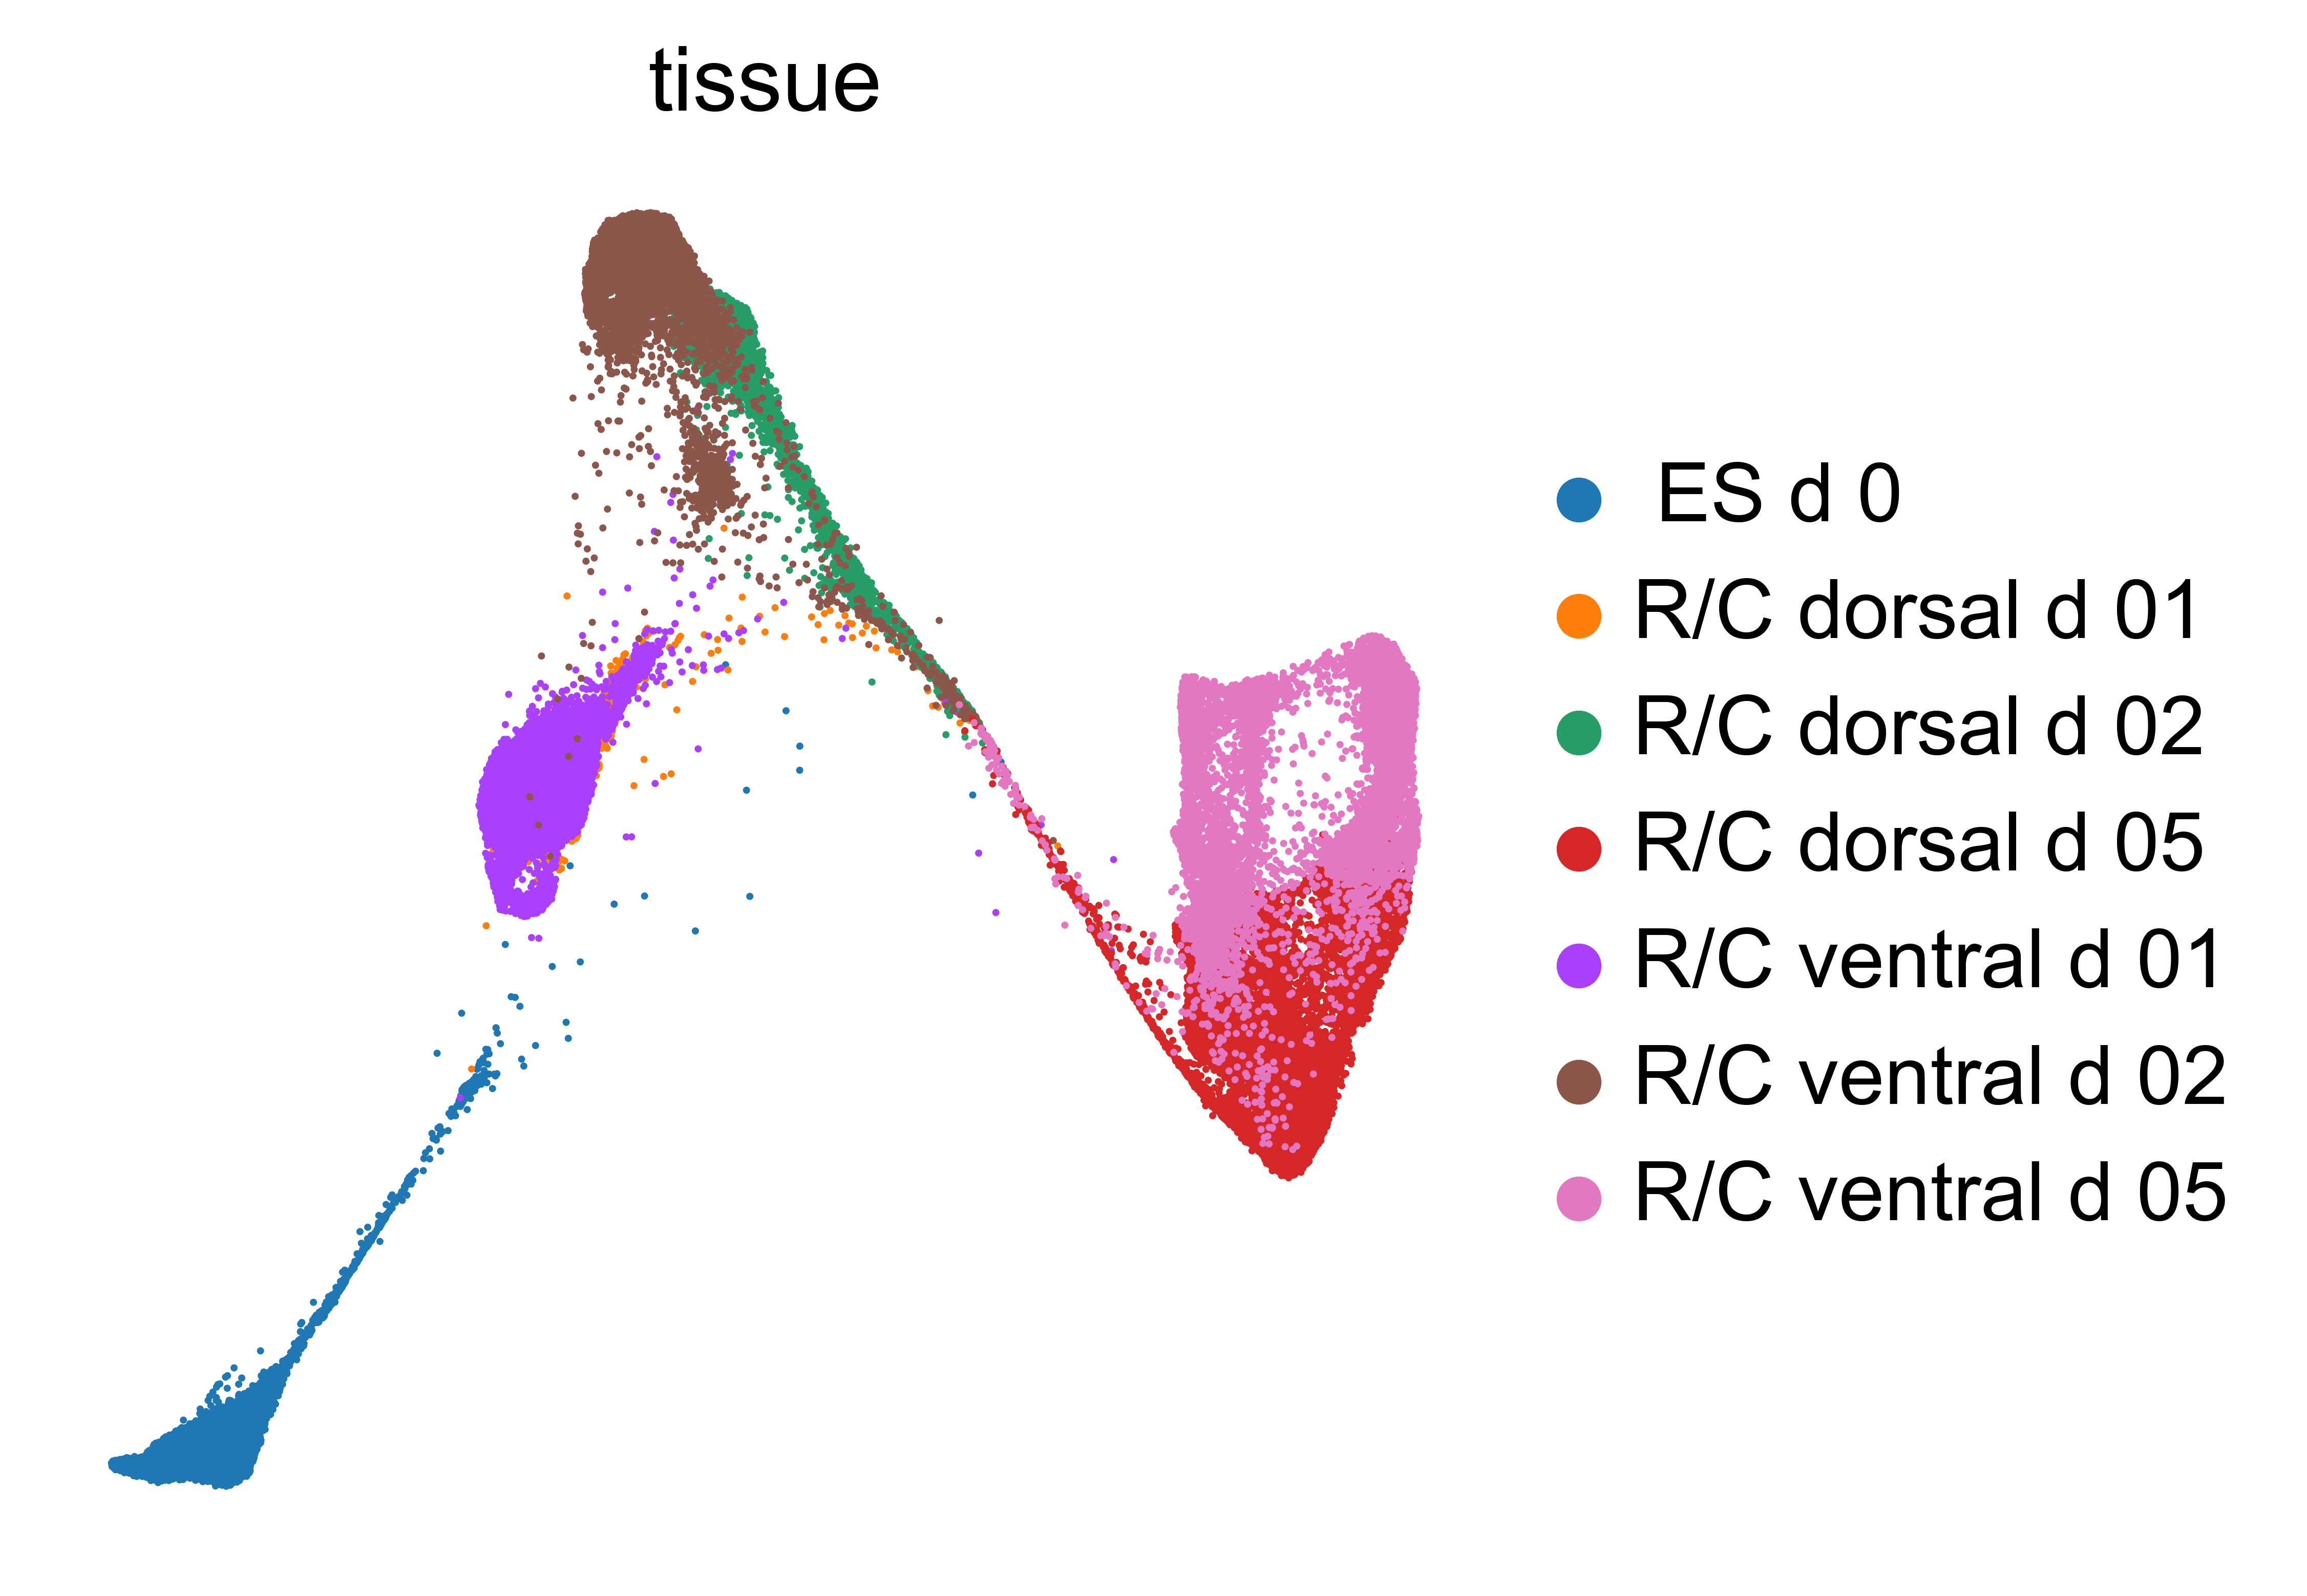

In [18]:
sc.pl.draw_graph(mistr_data, color = 'tissue' ,frameon=False,size=5)

## create a custom colormap 

In [19]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Define the custom colormap
colors = [(0.7, 0.7, 0.7), (1, 0, 1)]  # Light grey to purple
n_bins = 100  # Number of bins
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_bins)



In [ ]:
sc.pl.draw_graph(mistr_data, color = ['FOXA2'], color_map=cmap, save = 'FOXA2_early_patterning' ,frameon=False, wspace=0.5, size = 5)

In [21]:
mistr_data.write('mistr_d0_5_rc.h5ad')



In [2]:
mistr_data = sc.read('mistr_d0_5_rc.h5ad')

In [ ]:

mistr_data.uns['iroot'] = np.flatnonzero(mistr_data.obs['day']  == 'day 0')[0]
sc.tl.dpt(mistr_data, )

In [ ]:
sc.pl.draw_graph(mistr_data, color = ['model'], size = 5, frameon=False, save = 'mistr_early_patterning_model.svg')

In [ ]:
# Plot draw graph results
for color in ["OTX2", "GBX2" , "PAX6" , "SOX1", "tissue", "day"]:
    
    sc.pl.umap(mistr_data, color=color, frameon=False, color_map="YlGnBu")
    sc.pl.umap(mistr_data, color=color, frameon=False, show=False, color_map="YlGnBu")    

In [5]:
#make red colormap
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
my_cmap = mymap(np.arange(mymap.N))
my_cmap[:,-1] = np.linspace(0, 1, mymap.N)
my_cmap = colors.ListedColormap(my_cmap)

#sc.pl.draw_graph(mistr_data, color=['OTX2'], use_raw=True, color_map=my_cmap, show=False, frameon=False)

#make green colormap
colors2 = plt.cm.Greens(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
my_cmap3 = mymap(np.arange(mymap.N))
my_cmap3[:,-1] = np.linspace(0, 1, mymap.N)
my_cmap3 = colors.ListedColormap(my_cmap3)

#sc.pl.draw_graph(mistr_data, color=['GBX2'], use_raw=True, color_map=my_cmap3, show=False, frameon=False)

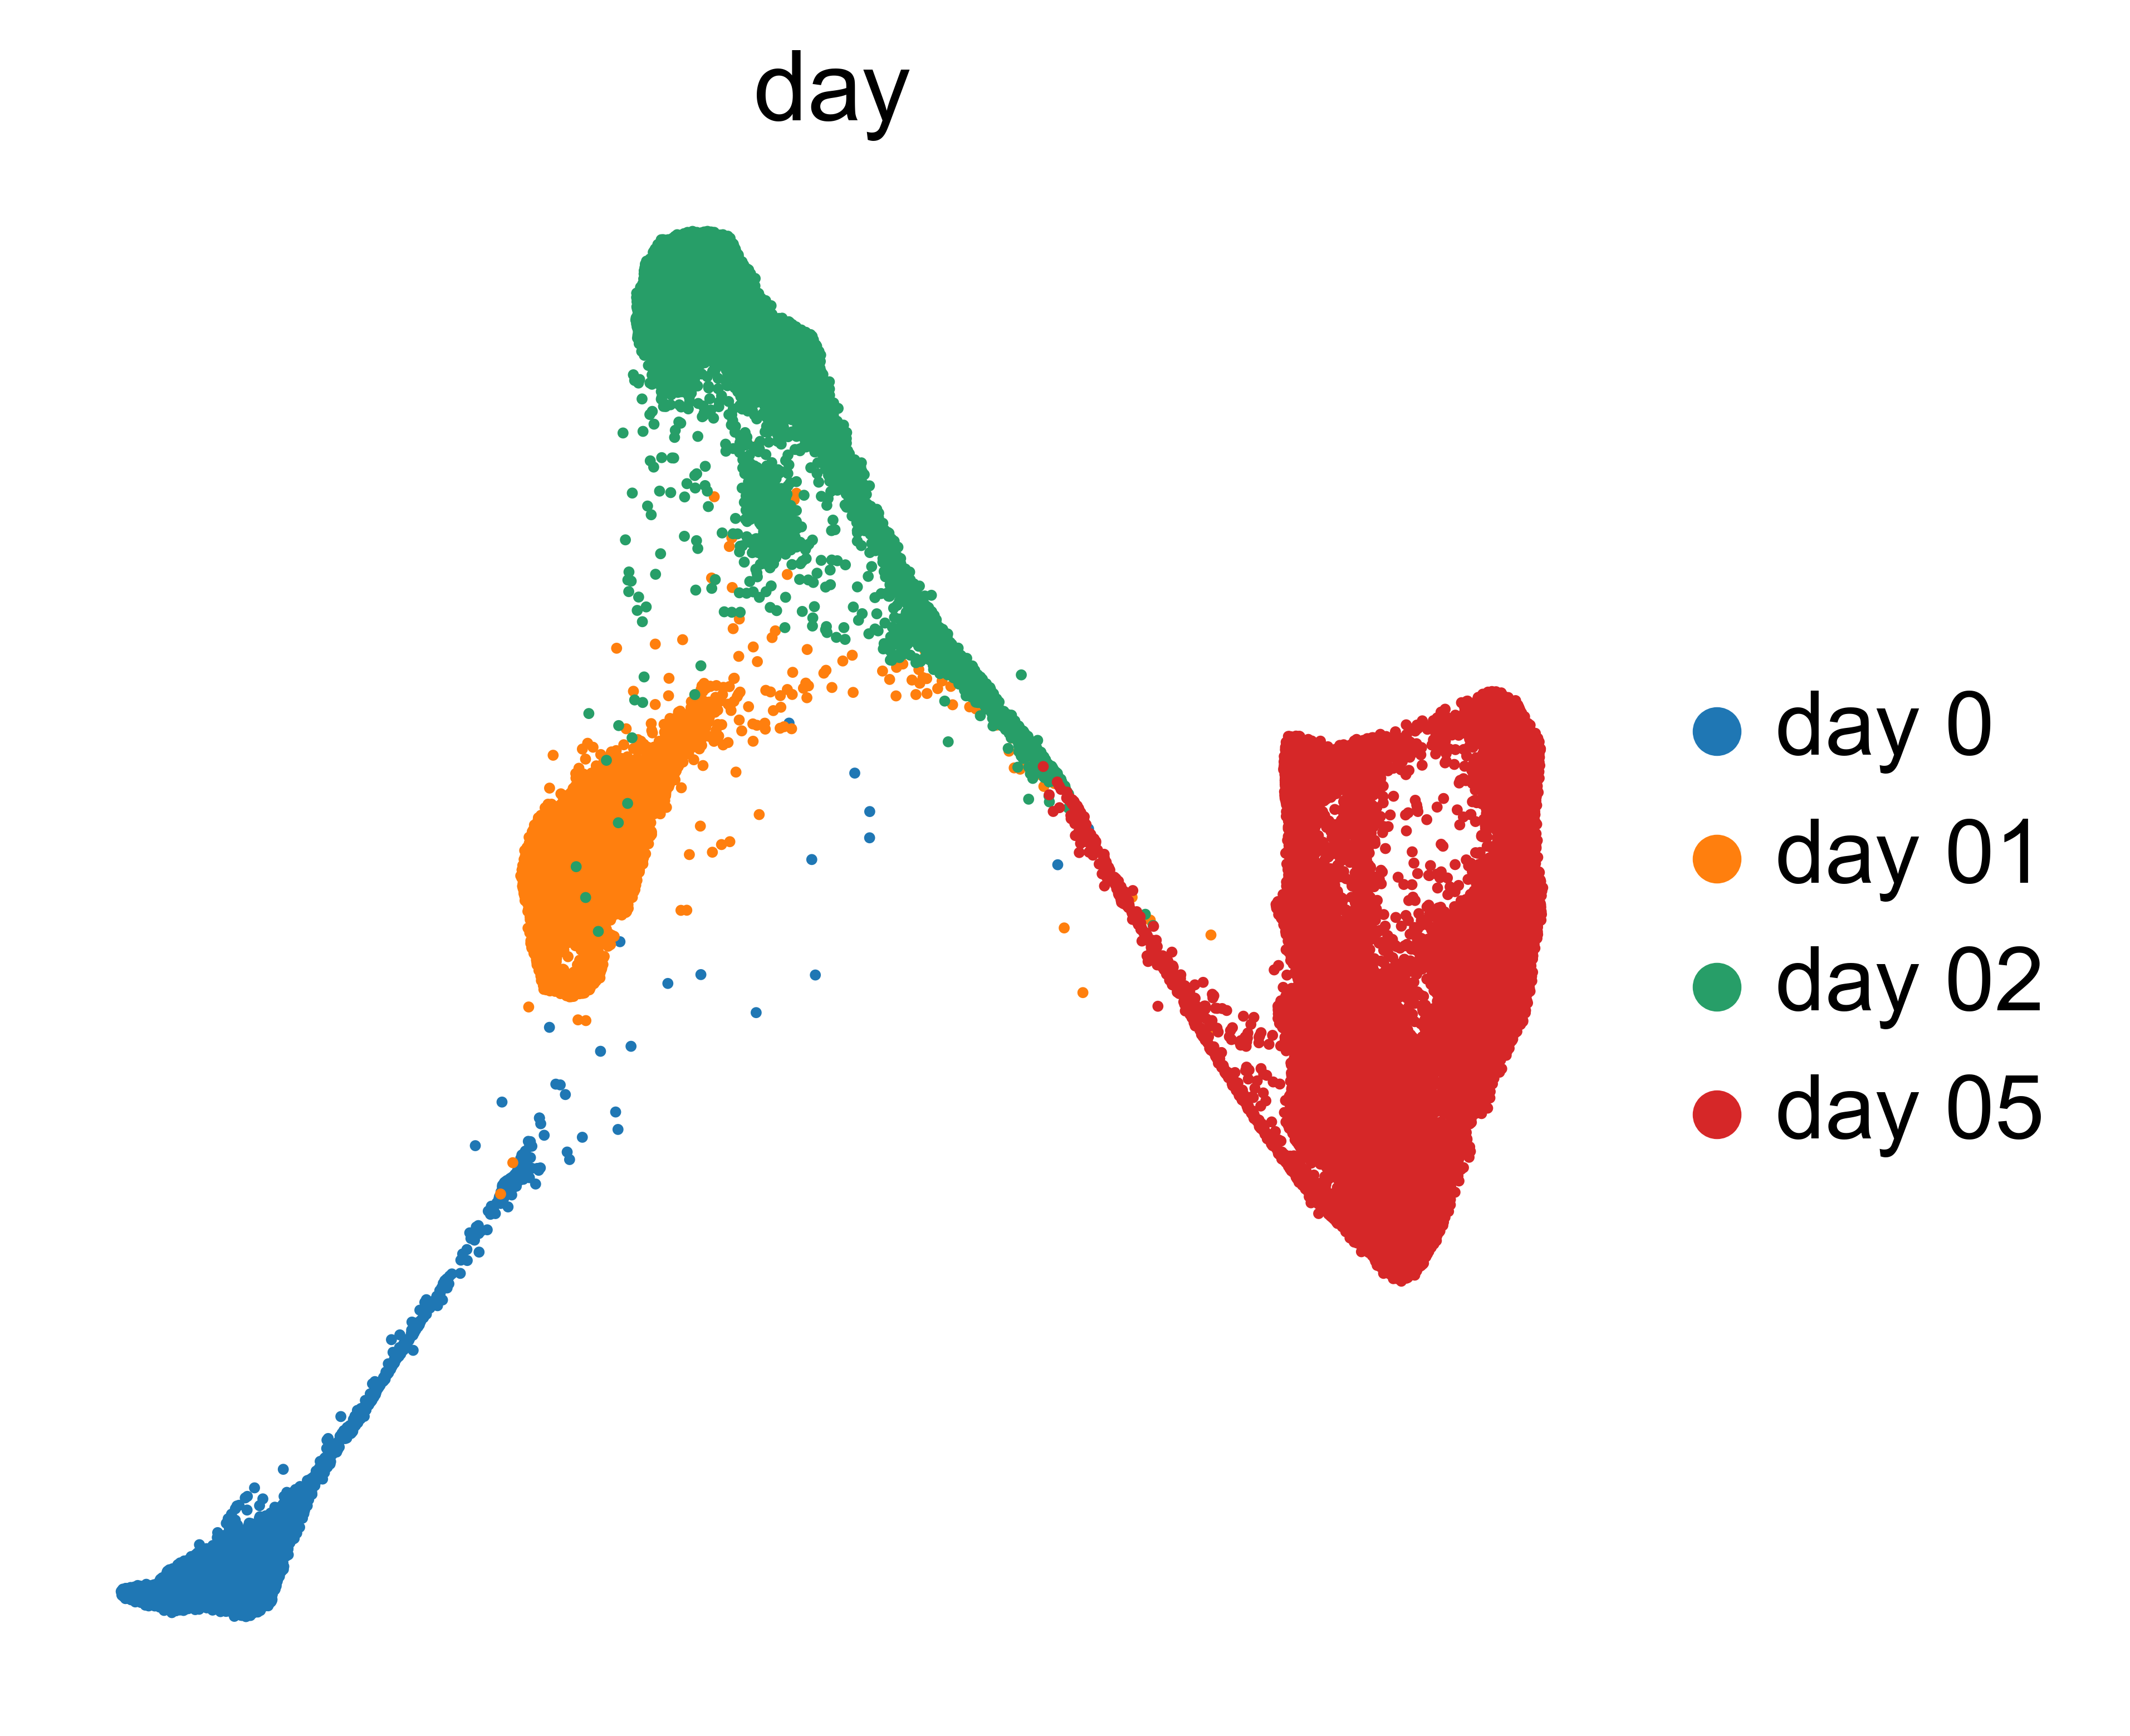

In [19]:
sc.pl.draw_graph(mistr_data, color = 'day', frameon=False,size=10, save = 'day.svg')

In [10]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(6,5)
ax = sc.pl.draw_graph(mistr_data, color=['GBX2'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['OTX2'], color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_GBX2_OTX2.svg', frameon=False, ax=ax)



In [11]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['SOX1'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['PAX6'], color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_SOX1_PAX6.svg', frameon=False, ax=ax)


In [12]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['NKX6-1'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['SIX3'],color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_NKX6-1_SIX3.svg', frameon=False, ax=ax)
#ax = sc.pl.draw_graph(mistr_data, color=['SIX3'], color_map=my_cmap3,size = 20, show=False, frameon=False)
#ax = sc.pl.draw_graph(mistr_data, color=['NKX6-1'],color_map=my_cmap,size = 20, show=False,save = 'early_patterning_NKX6-1_SIX3.svg', frameon=False, ax=ax)


In [13]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['POU5F1'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['NANOG'],color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_OCT4_NANOG.svg', frameon=False, ax=ax)
ax

<Axes: title={'center': 'NANOG'}, xlabel='FA1', ylabel='FA2'>

In [14]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['HESX1'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['POU5F1'],color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_HESX1_OCT4.svg', frameon=False, ax=ax)
ax

<Axes: title={'center': 'POU5F1'}, xlabel='FA1', ylabel='FA2'>

In [15]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['ZIC3'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['POU5F1'],color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_ZIC3_OCT4.svg', frameon=False, ax=ax)
ax

<Axes: title={'center': 'POU5F1'}, xlabel='FA1', ylabel='FA2'>

In [16]:
#combine images to one UMAP
#plt.rcParams['figure.figsize']=(10,10)
ax = sc.pl.draw_graph(mistr_data, color=['ZIC3'], color_map=my_cmap,size = 20, show=False, frameon=False)
ax = sc.pl.draw_graph(mistr_data, color=['HESX1'],color_map=my_cmap3,size = 20, show=False,save = 'early_patterning_ZIC3_HESX1.svg', frameon=False, ax=ax)
ax

<Axes: title={'center': 'HESX1'}, xlabel='FA1', ylabel='FA2'>

In [ ]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
my_cmap3 = mymap(np.arange(mymap.N))
my_cmap3[:,-1] = np.linspace(0, 1, mymap.N)
my_cmap3 = colors.ListedColormap(my_cmap3)

# Creating a color bar figure
fig, ax = plt.subplots()
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=my_cmap3), cax=ax)
cbar.set_label('Legend', fontsize=12)  # Set the label for the color bar

# Save the color bar as an image
fig.savefig('colormap_legend_red.png', bbox_inches='tight', dpi=300)

In [ ]:
colors2 = plt.cm.Greens(np.linspace(0, 1, 128))
colorsComb = np.vstack([colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
my_cmap3 = mymap(np.arange(mymap.N))
my_cmap3[:,-1] = np.linspace(0, 1, mymap.N)
my_cmap3 = colors.ListedColormap(my_cmap3)

# Creating a color bar figure
fig, ax = plt.subplots()
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=my_cmap3), cax=ax)
cbar.set_label('Legend', fontsize=12)  # Set the label for the color bar

# Save the color bar as an image
fig.savefig('colormap_legend_green.png', bbox_inches='tight', dpi=300)